In [8]:
import pandas as pd
import numpy as np
import os
from datetime import datetime as dt, timedelta
from dateutil.relativedelta import *
import re
from matplotlib import pyplot as plt
import seaborn as sns
import sqlite3
import scipy.stats as stats

In [5]:
goalie_data = pd.read_csv('goalietrainingdata.txt')
goalie_data.drop(columns=['Unnamed: 0'],inplace=True)

In [11]:
print('There are %d cases of injury.'%goalie_data['injured'].sum())

There are 830 cases of injury.


In [59]:
goalie_data.columns

Index(['player_id', 'team_id', 'opp_id', 'date_game', 'age', 'rest_days',
       'min_season', 'shots_against', 'save_pct', 'min3W', 'sa3W', 'svepct3W',
       'future_save_pct', 'injured'],
      dtype='object')

Perform T-Tests on the Data

In [49]:
np.random.seed(34)
#get random sample
no_injury = goalie_data[goalie_data['injured']==0].iloc[np.random.randint(0,50000,830),:]
injury = goalie_data[goalie_data['injured']==1]

In [60]:
cols = ['age','min_season','rest_days','shots_against','save_pct','min3W','sa3W','svepct3W']
for c in cols:
    print(c,stats.ttest_ind(no_injury[c],injury[c]))

age Ttest_indResult(statistic=-4.51822396289679, pvalue=6.246962879166647e-06)
min_season Ttest_indResult(statistic=2.037780250479534, pvalue=0.0415759354623696)
rest_days Ttest_indResult(statistic=1.3327834476909783, pvalue=0.18260752842882985)
shots_against Ttest_indResult(statistic=0.8817593091534912, pvalue=0.37791022543878794)
save_pct Ttest_indResult(statistic=-2.1417223580558313, pvalue=0.03221951835066541)
min3W Ttest_indResult(statistic=0.28274730534814446, pvalue=0.7773714468144829)
sa3W Ttest_indResult(statistic=-1.438326811866222, pvalue=0.15034613935928362)
svepct3W Ttest_indResult(statistic=-1.7665505248882785, pvalue=0.07730820304163644)


C:\Users\jesse\anaconda3\envs\takeaseat\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\jesse\anaconda3\envs\takeaseat\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


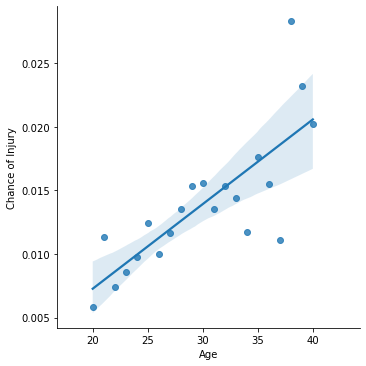

In [58]:
no_injury = goalie_data[goalie_data['injured']==0]
injury['age'] = injury['age'].astype(int)
injury = injury[injury['age']<=40]
no_injury['age'] = no_injury['age'].astype(int)
page = injury.groupby('age').count()/no_injury.groupby('age').count()
sns.lmplot('age','injured',page.reset_index())
plt.xlabel('Age')
plt.ylabel('Chance of Injury')
plt.show()

In [ ]:
no_injury = goalie_data[goalie_data['injured']==0]
no_injury['min_season'] = no_injury['age'].astype(int)
page = injury.groupby('age').count()/no_injury.groupby('age').count()
sns.lmplot('age','injured',page.reset_index())
plt.xlabel('Age')
plt.ylabel('Chance of Injury')
plt.show()

In [61]:
goalie_data

,player_id,team_id,opp_id,date_game,age,rest_days,min_season,shots_against,save_pct,min3W,sa3W,svepct3W,future_save_pct,injured
0,aebisda01,COL,CHI,2000-10-26,22.718,8,60.000000,21,0.952,60.000000,21,0.952381,1.000,0
1,aebisda01,COL,CAR,2000-11-03,22.740,8,120.000000,39,0.974,120.000000,39,0.974359,0.885,0
2,aebisda01,COL,MDA,2000-11-11,22.762,8,180.000000,65,0.938,120.000000,44,0.931818,0.947,0
3,aebisda01,COL,PHX,2000-11-16,22.775,5,240.000000,84,0.940,120.000000,45,0.911111,0.786,0
4,aebisda01,COL,NJD,2000-12-05,22.827,19,299.916667,112,0.902,59.916667,28,0.785714,0.818,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65317,zatkoje01,LAK,DAL,2016-12-23,29.540,8,341.316667,145,0.890,124.266667,39,0.871795,0.903,0
65318,zatkoje01,LAK,DET,2017-01-05,29.575,13,402.433333,176,0.892,61.116667,31,0.903226,0.818,0
65319,zatkoje01,LAK,DAL,2017-01-09,29.586,4,462.433333,198,0.884,121.116667,53,0.867925,1.000,0
65320,zatkoje01,LAK,NYR,2017-01-23,29.625,14,471.200000,201,0.886,68.766667,25,0.840000,0.824,0


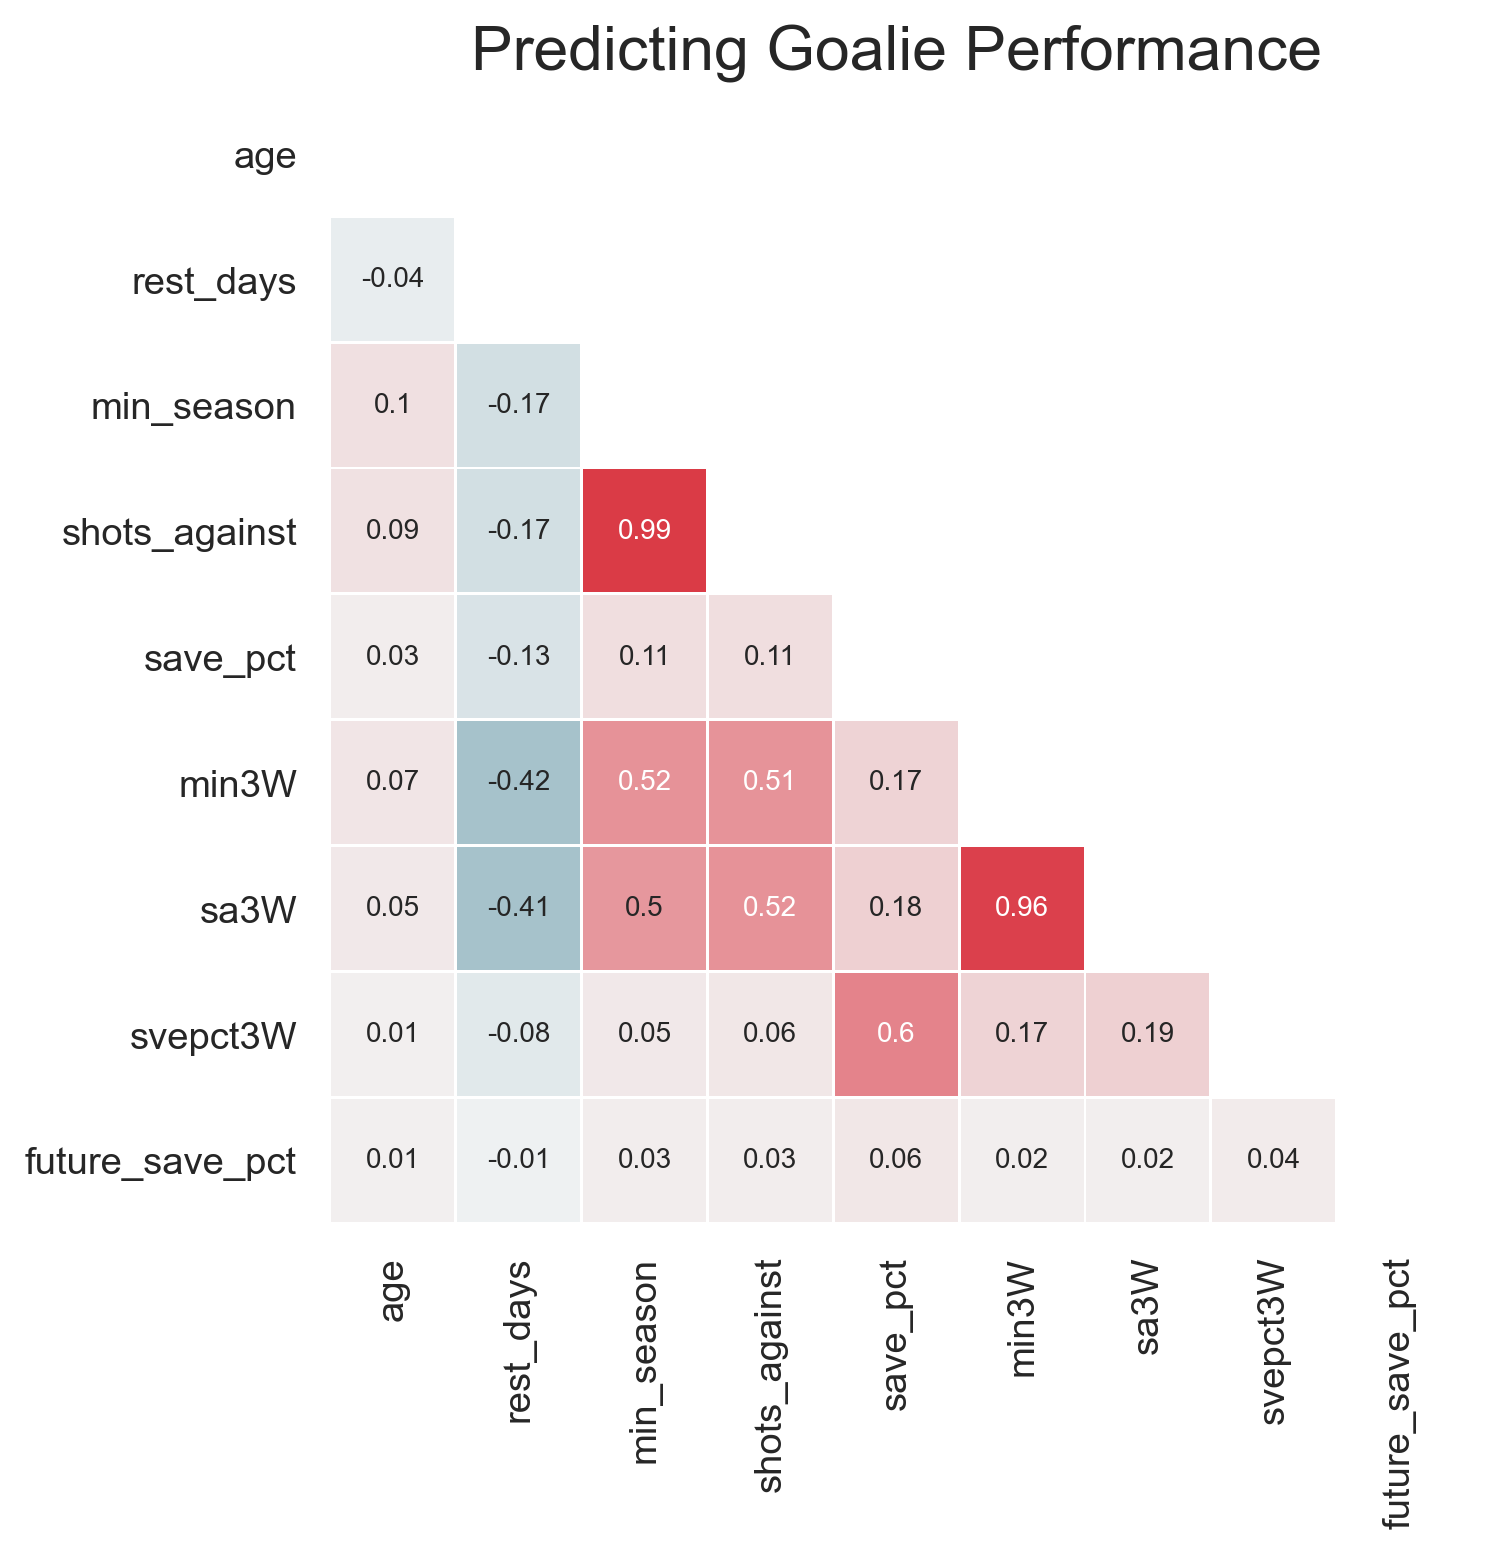

In [64]:
#add test data back for EDA
fig4 = plt.figure(figsize=(12,6),dpi=250)
sns.set(font_scale=1)
corr1 = np.round(goalie_data[['age','rest_days','min_season','shots_against','save_pct','min3W','sa3W','svepct3W','future_save_pct']].corr(),2)
# Generate a mask for the upper triangle
npmask1 = np.triu(np.ones_like(goalie_data[['age','rest_days','min_season','shots_against','save_pct','min3W','sa3W','svepct3W','future_save_pct']].corr(), dtype=np.bool))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr1,mask=npmask1,annot=True,annot_kws={"size": 8},square=True,cmap=cmap,vmax=1, center=0,linewidths=.5,  cbar=False)
plt.title('Predicting Goalie Performance',fontsize=18)
plt.gca().set_facecolor('white')